In [6]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pickle
import plotly.express as px

 
## This statement allows the visuals to render within your Jupyter Notebook.


## Loading the data


In [7]:
Player_raw = pd.read_csv("final_data.csv")



### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [8]:
Player_raw

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.000000,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.000000,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.000000,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.000000,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.000000,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,/aidan-simmons/profil/spieler/867763,Western Sydney Wanderers,Aidan Simmons,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,...,0.000000,0.000000,1023,0,0,0,75000,75000,4,1
10750,/kusini-yengi/profil/spieler/708099,Western Sydney Wanderers,Kusini Yengi,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,...,0.000000,0.000000,1449,102,18,0,300000,300000,4,0
10751,/nathanael-blair/profil/spieler/1023268,Western Sydney Wanderers,Nathanael Blair,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,...,0.000000,0.000000,960,0,0,0,50000,50000,4,0
10752,/zachary-sapsford/profil/spieler/703657,Western Sydney Wanderers,Zachary Sapsford,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,...,0.000000,0.000000,865,0,0,0,50000,50000,4,0


## 1. Data Profiling:


In [9]:
Player_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [10]:
Player_raw.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


### Data Quality Checks


#### 1. Reliability:


The data source is collected from several top-tier global football leagues, so it is considered a trustworthy source

#### 2. Timeliness: 


The date of data collected is on June 10, 2023

#### 3. Consistency: 




We have one data source, so we don't have any consistency issues

#### 4. Relevance: 



Sample Appropriateness: is data sample aligns with your analysis objectives.


In [11]:
#investigate all the elemenys within each feature

for column in Player_raw:
    unique_vals = np.unique(Player_raw[column].fillna('0'))
    nr_values = len(unique_vals)
    if nr_values <= 16:
        print(f'The number of values for feature {column} :{nr_values}--{unique_vals}')
    else:
        print(f'The number of values for feature {column} :{nr_values}')
        

The number of values for feature player :10754
The number of values for feature team :374
The number of values for feature name :10584
The number of values for feature position :16--['Attack' 'Attack Centre-Forward' 'Attack-LeftWinger' 'Attack-RightWinger'
 'Attack-SecondStriker' 'Defender' 'Defender Centre-Back'
 'Defender Left-Back' 'Defender Right-Back' 'Goalkeeper' 'midfield'
 'midfield-AttackingMidfield' 'midfield-CentralMidfield'
 'midfield-DefensiveMidfield' 'midfield-LeftMidfield'
 'midfield-RightMidfield']
The number of values for feature height :47
The number of values for feature age :30
The number of values for feature appearance :108
The number of values for feature goals :5329
The number of values for feature assists :5065
The number of values for feature yellow cards :6291
The number of values for feature second yellow cards :1095
The number of values for feature red cards :1219
The number of values for feature goals conceded :742
The number of values for feature clean s

In [12]:
#Position column contains a mix of generic and specific roles, 
#we need to preprocess the data to handle this effectively and avoid redundancy or noise in the model.

position_mapping = {
    'Attack': 'Attack',
    'Attack Centre-Forward': 'Attack',
    'Attack-LeftWinger': 'Attack',
    'Attack-RightWinger': 'Attack',
    'Attack-SecondStriker': 'Attack',
    'Defender': 'Defender',
    'Defender Centre-Back': 'Defender',
    'Defender Left-Back': 'Defender',
    'Defender Right-Back': 'Defender',
    'Goalkeeper': 'Goalkeeper',
    'midfield': 'Midfield',
    'midfield-AttackingMidfield': 'Midfield',
    'midfield-CentralMidfield': 'Midfield',
    'midfield-DefensiveMidfield': 'Midfield',
    'midfield-LeftMidfield': 'Midfield',
    'midfield-RightMidfield': 'Midfield'
}

# Apply the mapping
Player_raw['Position_Group'] = Player_raw['position'].map(position_mapping)

In [13]:
for column in Player_raw:
    unique_vals = np.unique(Player_raw[column].fillna('0'))
    nr_values = len(unique_vals)
    if nr_values <= 16:
        print(f'The number of values for feature {column} :{nr_values}--{unique_vals}')
    else:
        print(f'The number of values for feature {column} :{nr_values}')

The number of values for feature player :10754
The number of values for feature team :374
The number of values for feature name :10584
The number of values for feature position :16--['Attack' 'Attack Centre-Forward' 'Attack-LeftWinger' 'Attack-RightWinger'
 'Attack-SecondStriker' 'Defender' 'Defender Centre-Back'
 'Defender Left-Back' 'Defender Right-Back' 'Goalkeeper' 'midfield'
 'midfield-AttackingMidfield' 'midfield-CentralMidfield'
 'midfield-DefensiveMidfield' 'midfield-LeftMidfield'
 'midfield-RightMidfield']
The number of values for feature height :47
The number of values for feature age :30
The number of values for feature appearance :108
The number of values for feature goals :5329
The number of values for feature assists :5065
The number of values for feature yellow cards :6291
The number of values for feature second yellow cards :1095
The number of values for feature red cards :1219
The number of values for feature goals conceded :742
The number of values for feature clean s

In [14]:
# Get unique combinations of 'Position_Group' and 'position_encoded'
unique_positions = Player_raw[['Position_Group', 'position_encoded']].drop_duplicates()

# Display the result
unique_positions

,Position_Group,position_encoded
0,Goalkeeper,1
3,Defender,2
14,Midfield,3
23,Attack,4


#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [15]:
Player_raw.duplicated().sum()

0

In [16]:
Player_raw['player'].duplicated().sum()

0

In [17]:
Player_raw['name'].duplicated().sum()

170

In [18]:
same_name =Player_raw[Player_raw['name'].duplicated(keep = False)].sort_values(by ='name')

In [19]:
same_name

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger,Position_Group
2206,/aaron-ramsey/profil/spieler/50057,OGC Nice,Aaron Ramsey,midfield-CentralMidfield,186.0,32.0,52,0.094970,0.158284,0.189940,...,0.0,2843,342,38,9,3000000,45000000,3,0,Midfield
5597,/aaron-ramsey/profil/spieler/646658,Middlesbrough FC,Aaron Ramsey,midfield-AttackingMidfield,181.0,20.0,55,0.393873,0.253204,0.084401,...,0.0,3199,0,0,0,5000000,5000000,3,0,Midfield
9104,/abdulaziz-majrashi/profil/spieler/444714,Al-Tai,Abdulaziz Majrashi,Defender Right-Back,162.0,31.0,39,0.000000,0.000000,0.358387,...,0.0,2009,27,0,0,150000,200000,2,1,Defender
9079,/abdulaziz-majrashi/profil/spieler/500321,Damac FC,Abdulaziz Majrashi,midfield-DefensiveMidfield,173.0,27.0,43,0.000000,0.037578,0.112735,...,0.0,2395,0,0,0,75000,150000,3,0,Midfield
9295,/abdullah-al-yousef/profil/spieler/478535,Al-Adalah FC,Abdullah Al-Yousef,Defender Left-Back,174.0,33.0,4,0.000000,0.000000,0.000000,...,0.0,176,0,0,0,25000,125000,2,1,Defender
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3679,/wanderson/profil/spieler/316067,América Futebol Clube (MG),Wanderson,Defender Centre-Back,186.0,32.0,4,0.000000,0.000000,0.000000,...,0.0,360,0,0,0,300000,1750000,2,0,Defender
3751,/wesley/profil/spieler/964580,CR Flamengo,Wesley,Defender Right-Back,173.0,19.0,10,0.000000,0.110701,0.000000,...,0.0,813,0,0,1,150000,150000,2,1,Defender
3497,/wesley/profil/spieler/674732,Cruzeiro Esporte Clube,Wesley,Attack-LeftWinger,175.0,24.0,10,0.456081,0.000000,0.456081,...,0.0,592,105,31,5,6000000,7000000,4,1,Attack
4203,/ze-carlos/profil/spieler/617679,Gil Vicente FC,Zé Carlos,Defender Right-Back,177.0,24.0,47,0.000000,0.105541,0.343008,...,0.0,3411,0,0,1,800000,1500000,2,1,Defender


In [20]:
same_name.loc[same_name['name']=='Abdullah Al-Yousef','player'].tolist()

['/abdullah-al-yousef/profil/spieler/478535',
 '/abdullah-al-yousef/profil/spieler/180926']

For column name is it ok to have the duplicate name because it is normal to have more than one person have the same name, I checked their information from the data set, each player has a different height, age, appearance .. etc. This emphasizes that there are differences.

#### 6. Completeness: 


In [21]:
Player_raw.isnull().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
Position_Group         0
dtype: int64

#### 7. Check Accuracy:


to Validating the appropriateness of data types for the dataset

In [22]:
print(Player_raw['height'].apply(float.is_integer).all())
print(Player_raw['age'].apply(float.is_integer).all())

False
False


In [23]:
# Check if all values in the columns are integers (though stored as floats)
columns_to_check = ['goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards', 'goals conceded', 'clean sheets']
for col in columns_to_check:
    print(f"Column '{col}' contains only integers: {Player_raw[col].apply(float.is_integer).all()}")

Column 'goals' contains only integers: False
Column 'assists' contains only integers: False
Column 'yellow cards' contains only integers: False
Column 'second yellow cards' contains only integers: False
Column 'red cards' contains only integers: False
Column 'goals conceded' contains only integers: False
Column 'clean sheets' contains only integers: False


In [24]:
for col in columns_to_check:
    Player_raw[col] = Player_raw[col].round(0).astype('int64')

In [25]:
Player_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  int64  
 8   assists              10754 non-null  int64  
 9   yellow cards         10754 non-null  int64  
 10  second yellow cards  10754 non-null  int64  
 11  red cards            10754 non-null  int64  
 12  goals conceded       10754 non-null  int64  
 13  clean sheets         10754 non-null  int64  
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [26]:
Player_raw.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.052539,0.013018,0.053004,0.000465,0.002046,0.128882,0.023154,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.263272,0.130161,0.447753,0.021559,0.080657,0.444583,0.922922,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.000000,4.000000,30.000000,1.000000,7.000000,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


In [27]:
Player_raw[Player_raw['age'] == 15.000000]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger,Position_Group
6724,/stiven-jimenez/profil/spieler/1008431,FC Cincinnati,Stiven Jimenez,midfield-DefensiveMidfield,168.000000,15.0,9,0,0,1,...,0,660,0,0,0,0,0,3,0,Midfield
6989,/nimfasha-berchimas/profil/spieler/1000273,Charlotte FC,Nimfasha Berchimas,Attack-LeftWinger,181.240353,15.0,1,0,0,0,...,0,65,0,0,0,25000,25000,4,1,Attack
7267,/luis-rivera/profil/spieler/999379,Real Salt Lake City,Luis Rivera,Defender Centre-Back,181.240353,15.0,7,0,0,0,...,0,472,0,0,0,50000,50000,2,0,Defender
7290,/axel-kei/profil/spieler/921859,Real Salt Lake City,Axel Kei,Attack Centre-Forward,185.000000,15.0,1,0,0,0,...,0,44,103,18,0,0,0,4,0,Attack
7427,/maximo-carrizo/profil/spieler/989968,New York City FC,Máximo Carrizo,midfield-AttackingMidfield,160.000000,15.0,4,0,0,0,...,0,295,0,0,0,0,0,3,0,Midfield
8662,/taiga-kameda/profil/spieler/1126311,Vissel Kobe,Taiga Kameda,Goalkeeper,183.000000,15.0,5,0,0,0,...,0,450,0,0,0,0,0,1,0,Goalkeeper


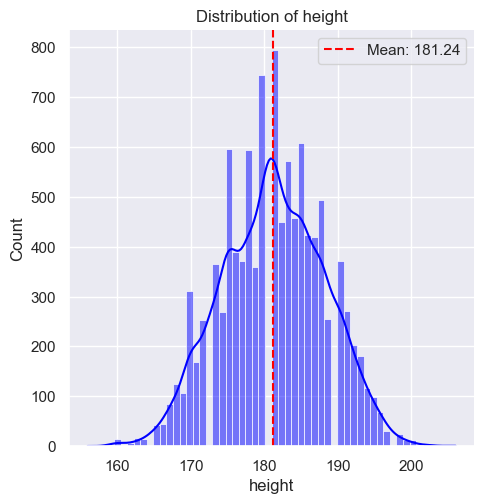

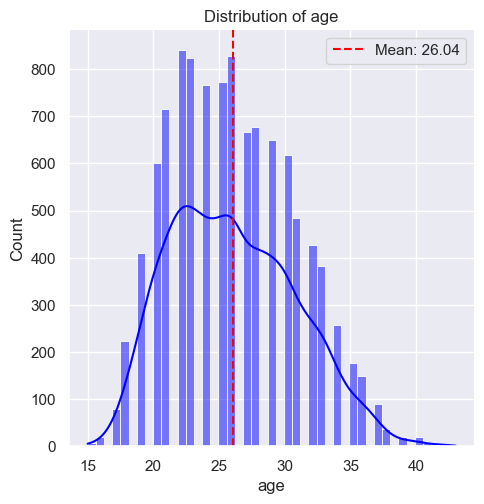

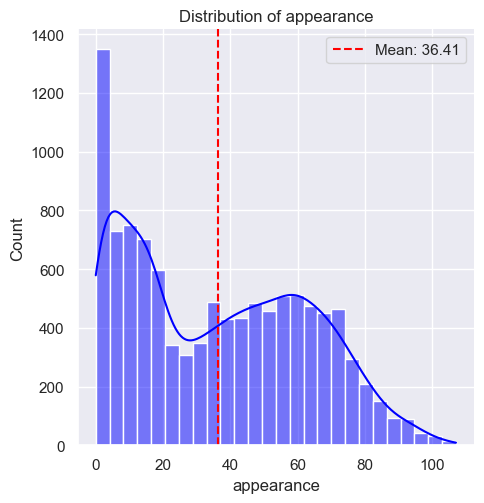

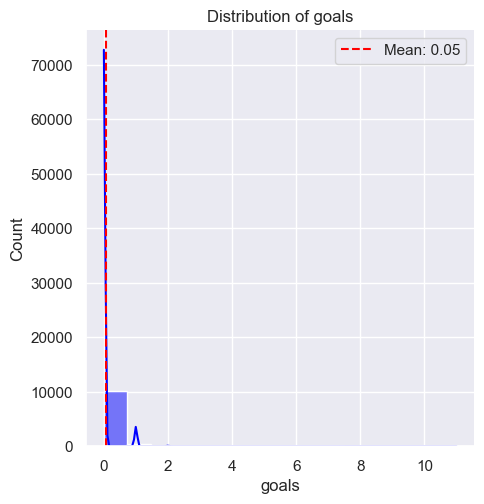

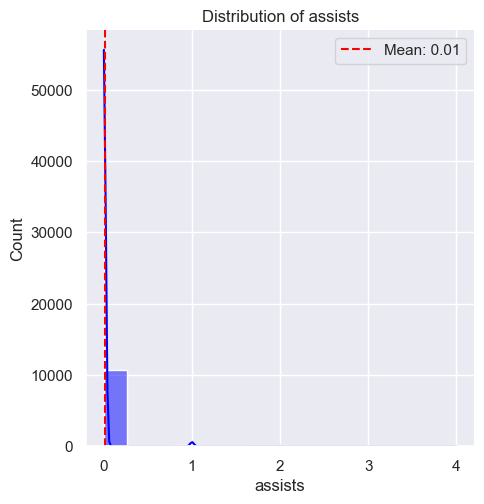

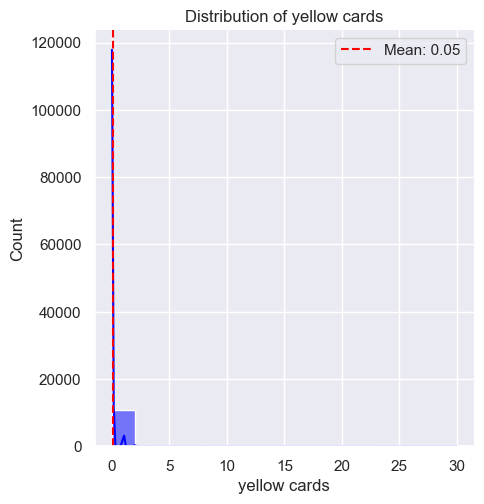

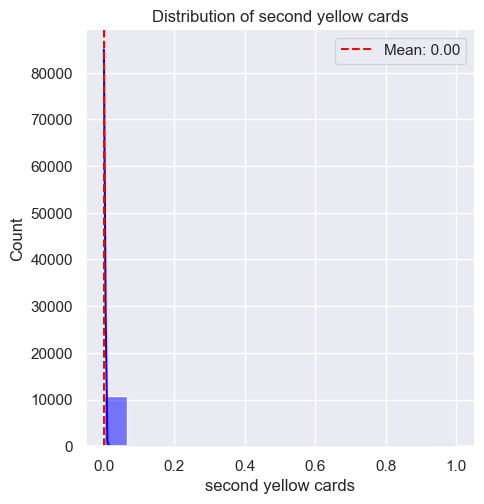

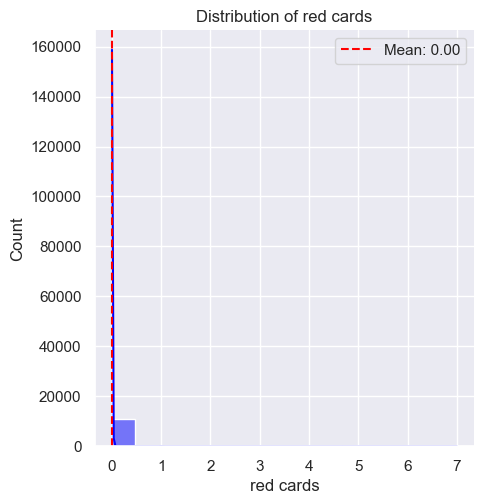

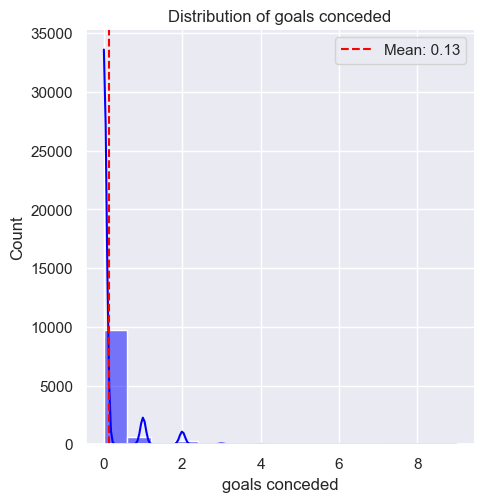

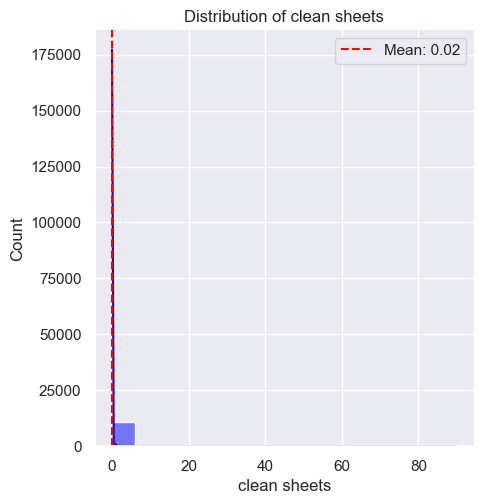

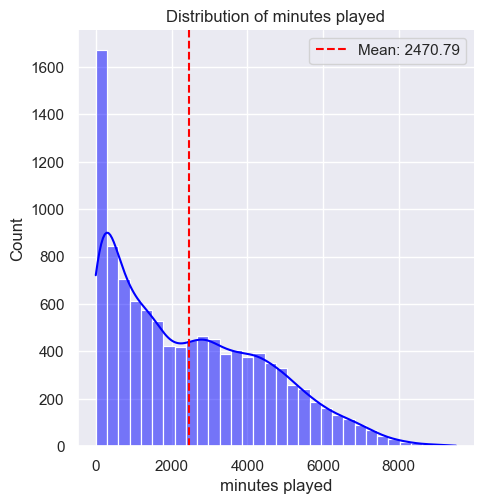

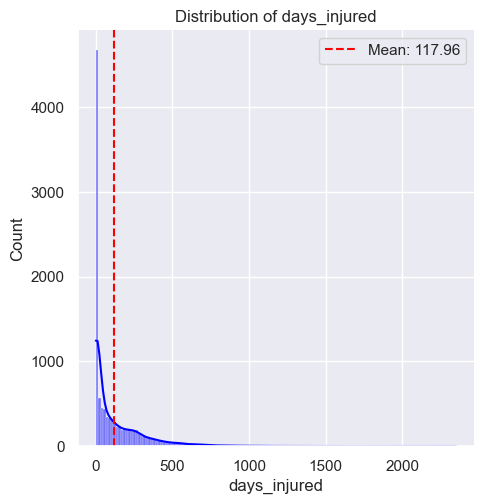

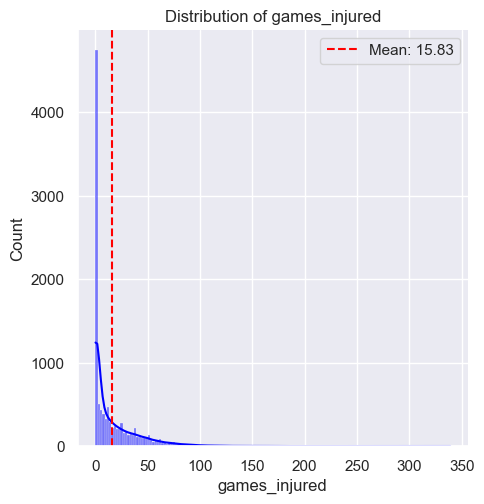

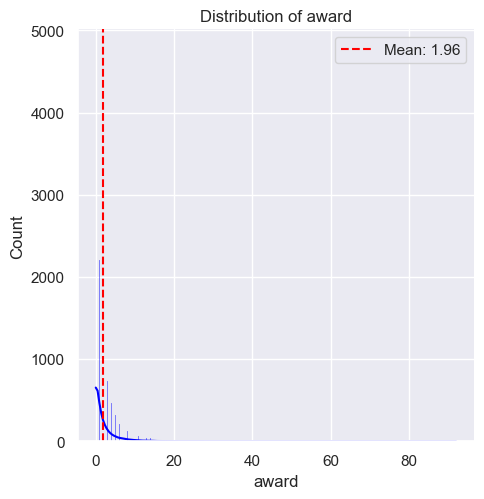

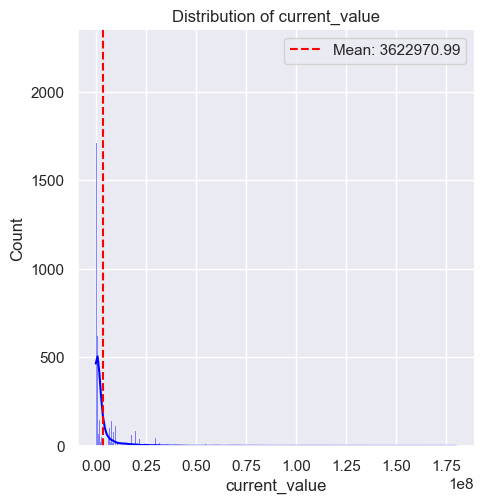

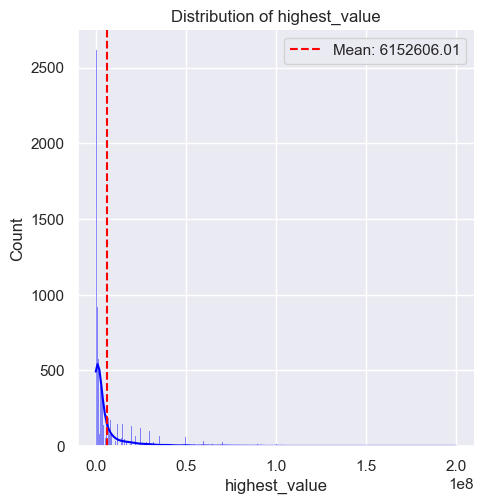

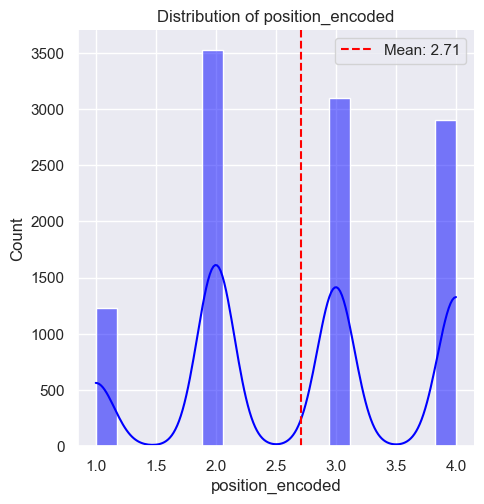

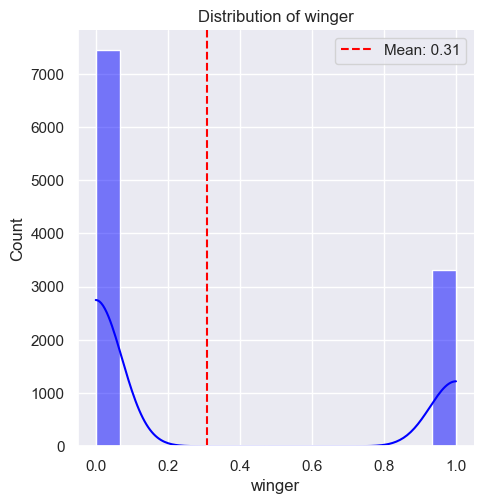

In [28]:
# Identifying all numeric columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
n_variables = Player_raw.select_dtypes(include=numerics).columns  # Use your dataset name

# Increases the size of sns plots
sns.set(rc={'figure.figsize': (8, 5)})

# Loop through all numeric columns and create distribution plots
for n in n_variables:
    # Creating a distribution plot for each numeric column
    sns.displot(Player_raw[n], kde=True, color='blue')  # Add kde=True for the density curve
    plt.title(f'Distribution of {n}')  # Add a title for better readability
    
    # Calculating and plotting the mean
    mean = Player_raw[n].mean()
    plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')  # Display mean with a label
    plt.legend()  # Show legend for mean line
    plt.show()  # Display the plot

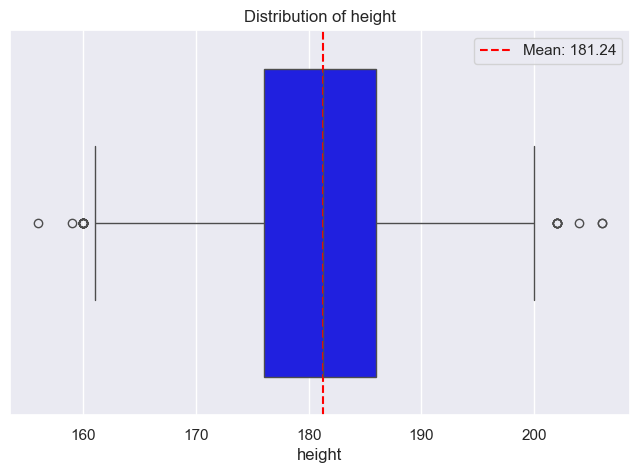

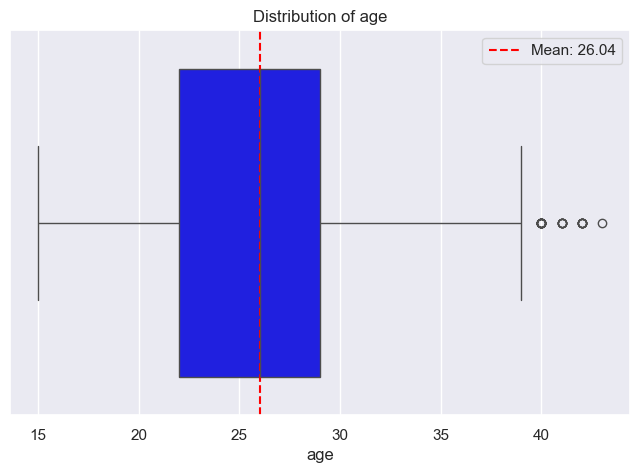

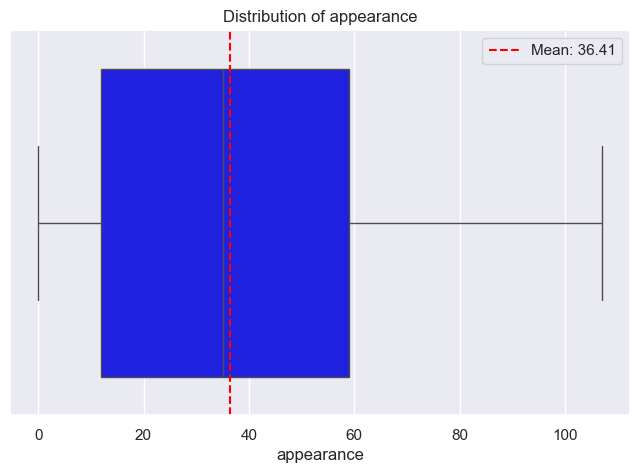

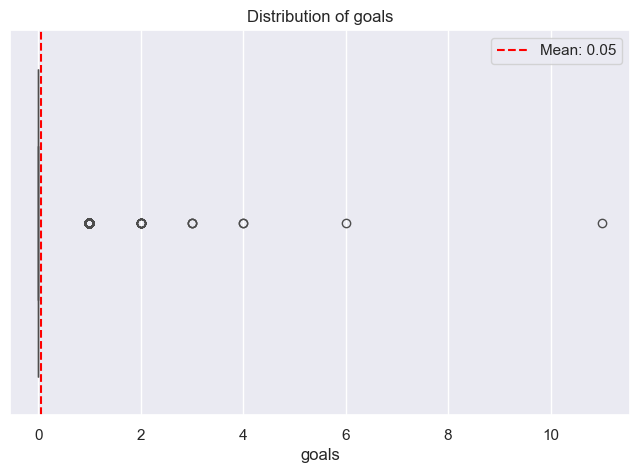

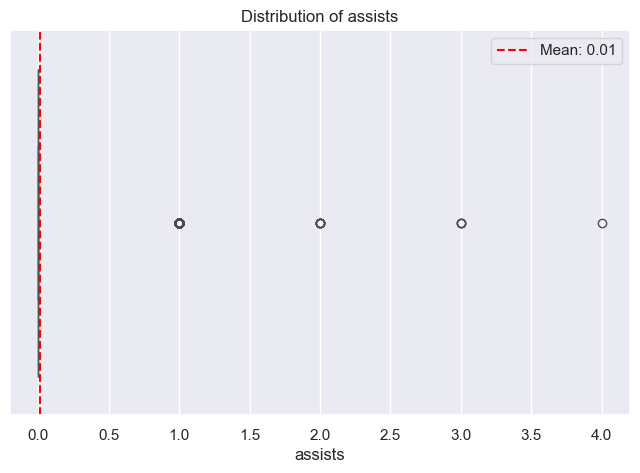

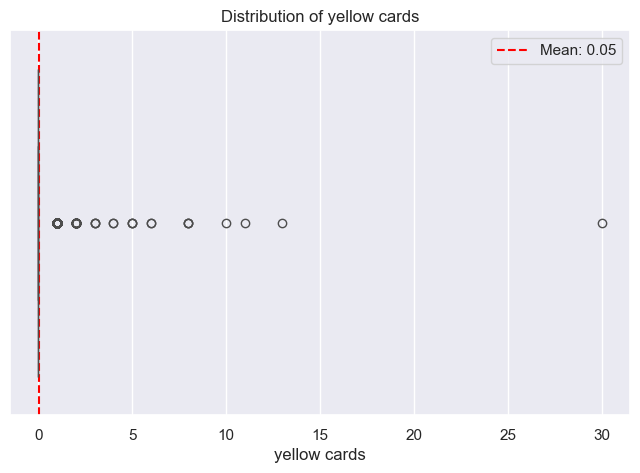

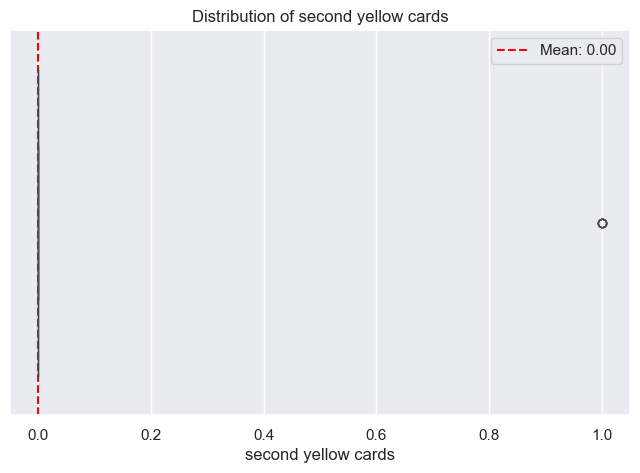

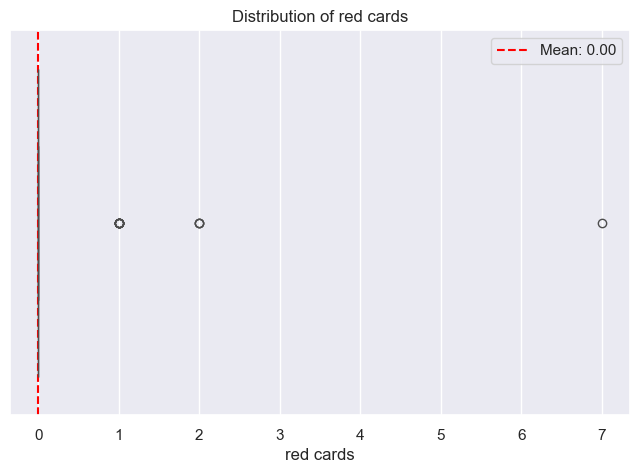

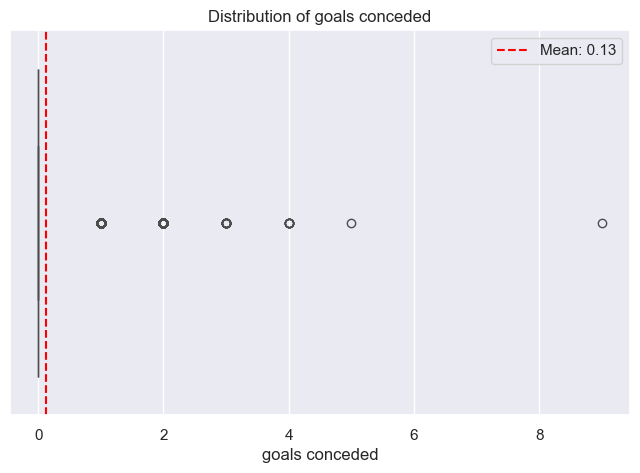

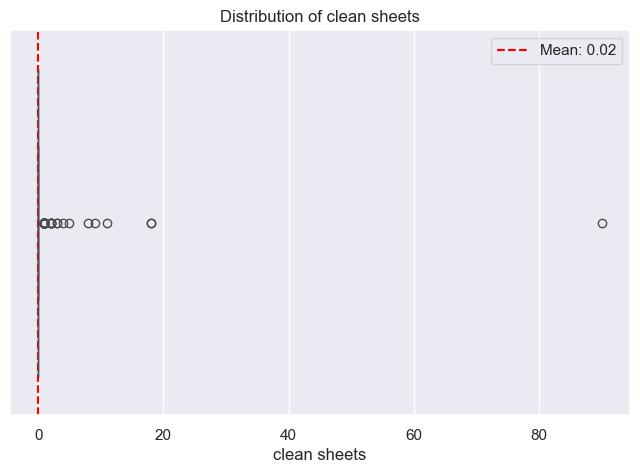

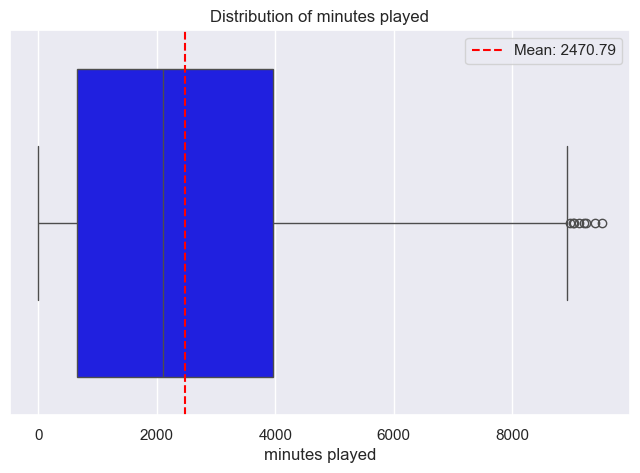

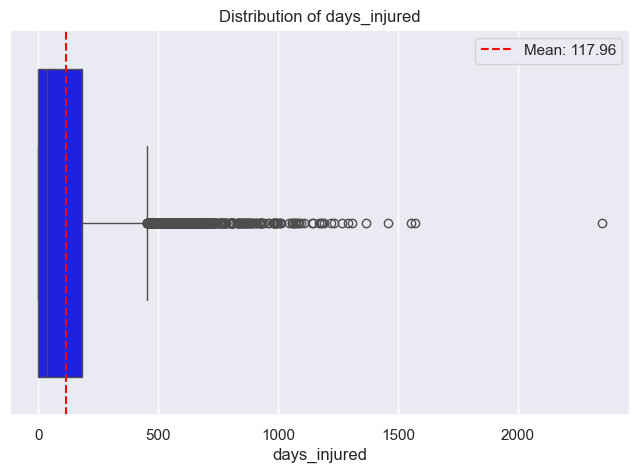

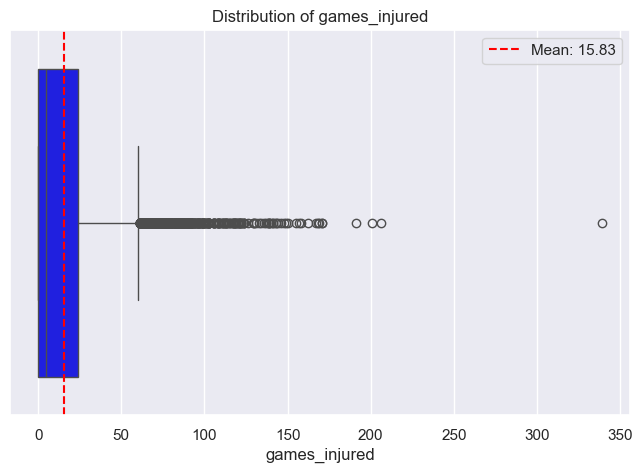

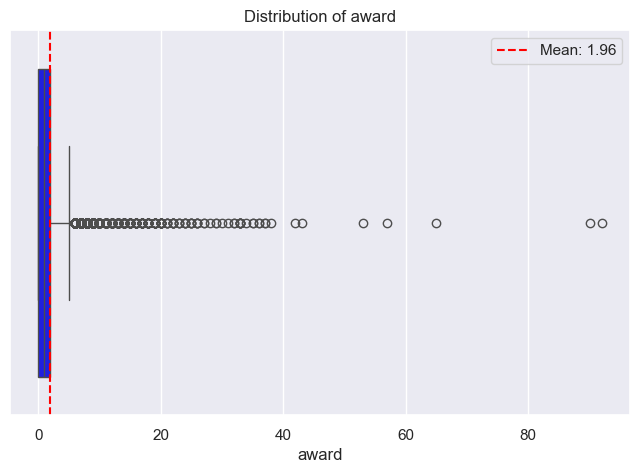

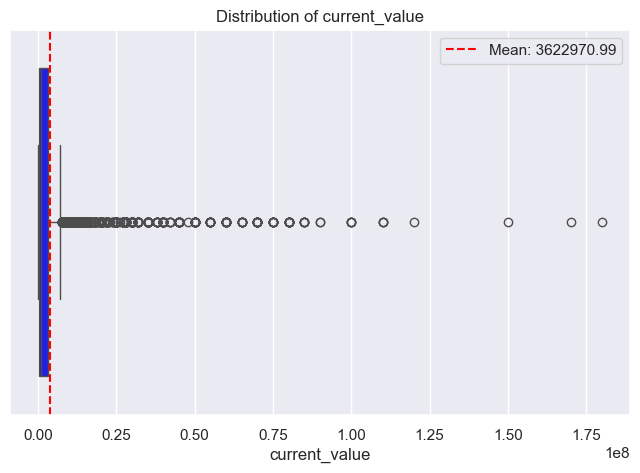

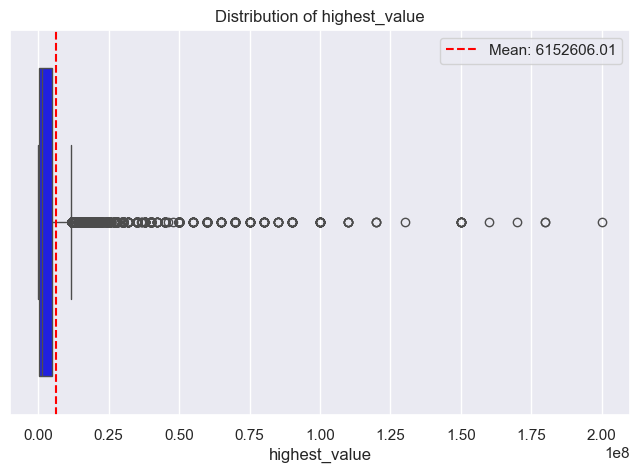

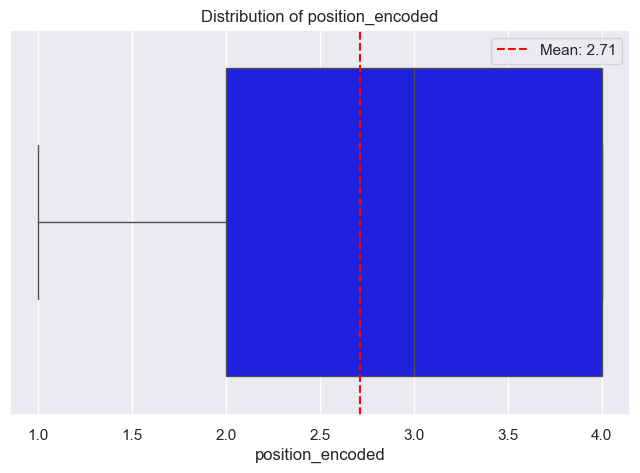

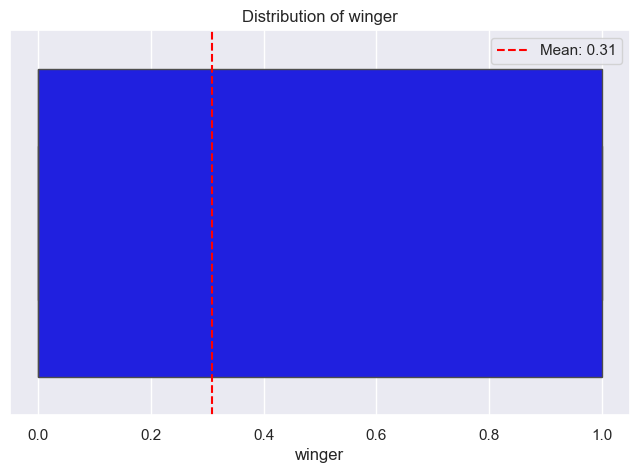

In [29]:
# Increase the size of sns plots
sns.set(rc={'figure.figsize': (8, 5)})

# Loop through all numeric columns and create boxplots
for n in n_variables:
    # Creating a boxplot for the numeric column
    sns.boxplot(x=Player_raw[n], color='blue')  # Boxplot for the column
    plt.title(f'Distribution of {n}')  # Add a title for better readability
    
    # OPTIONAL: Add a vertical line for the mean
    mean = Player_raw[n].mean()
    plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
    plt.legend()  # Add legend for the mean line
    
    # Show the plot
    plt.show()

In [30]:
Player_raw[Player_raw['current_value'] > 100000000]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger,Position_Group
450,/phil-foden/profil/spieler/406635,Manchester City,Phil Foden,Attack-LeftWinger,171.0,23.0,93,0,0,0,...,0,5844,121,23,15,110000000,110000000,4,1,Attack
453,/erling-haaland/profil/spieler/418560,Manchester City,Erling Haaland,Attack Centre-Forward,195.0,22.0,83,1,0,0,...,0,6519,204,36,17,170000000,170000000,4,0,Attack
474,/bukayo-saka/profil/spieler/433177,Arsenal FC,Bukayo Saka,Attack-RightWinger,178.0,21.0,91,0,0,0,...,0,7103,27,2,2,110000000,110000000,4,1,Attack
960,/jude-bellingham/profil/spieler/581678,Borussia Dortmund,Jude Bellingham,midfield-CentralMidfield,186.0,19.0,86,0,0,0,...,0,7353,19,4,2,120000000,120000000,3,0,Midfield
1017,/jamal-musiala/profil/spieler/580195,Bayern Munich,Jamal Musiala,midfield-AttackingMidfield,184.0,20.0,87,0,0,0,...,0,5004,66,6,11,110000000,110000000,3,0,Midfield
1521,/vinicius-junior/profil/spieler/371998,Real Madrid,Vinicius Junior,Attack-LeftWinger,176.0,22.0,107,0,0,0,...,0,9033,70,12,12,150000000,150000000,4,1,Attack
2644,/kylian-mbappe/profil/spieler/342229,Paris Saint-Germain,Kylian Mbappé,Attack Centre-Forward,178.0,24.0,89,1,0,0,...,0,7476,139,23,37,180000000,200000000,4,0,Attack


## Visualization Data

In [31]:
Player_raw.columns.values

array(['player', 'team', 'name', 'position', 'height', 'age',
       'appearance', 'goals', 'assists', 'yellow cards',
       'second yellow cards', 'red cards', 'goals conceded',
       'clean sheets', 'minutes played', 'days_injured', 'games_injured',
       'award', 'current_value', 'highest_value', 'position_encoded',
       'winger', 'Position_Group'], dtype=object)

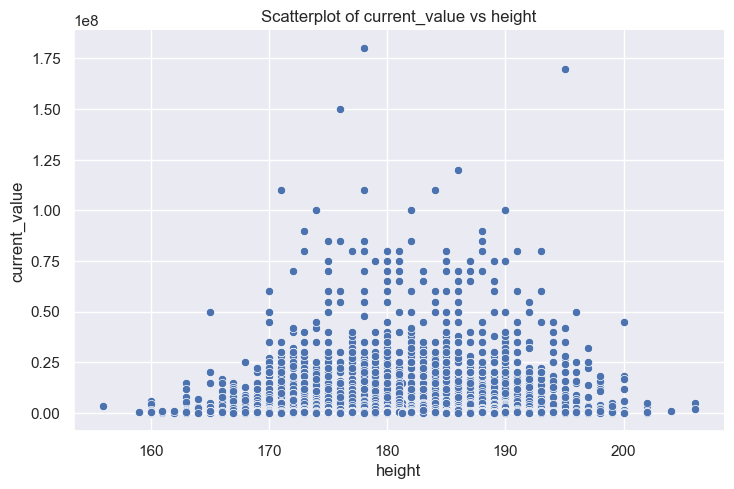

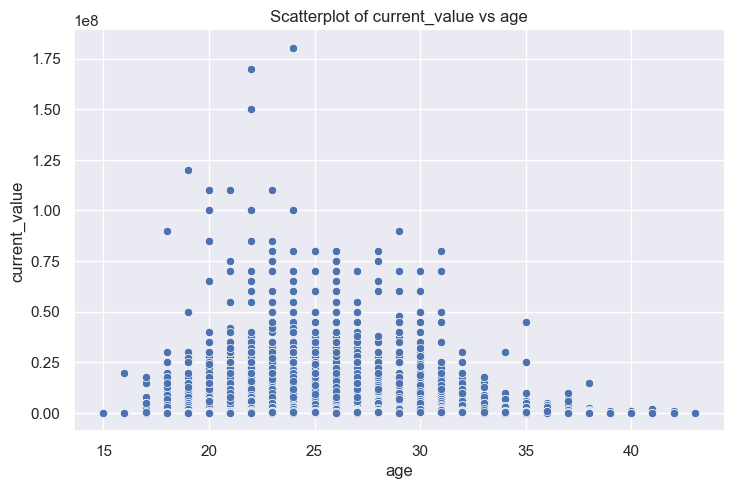

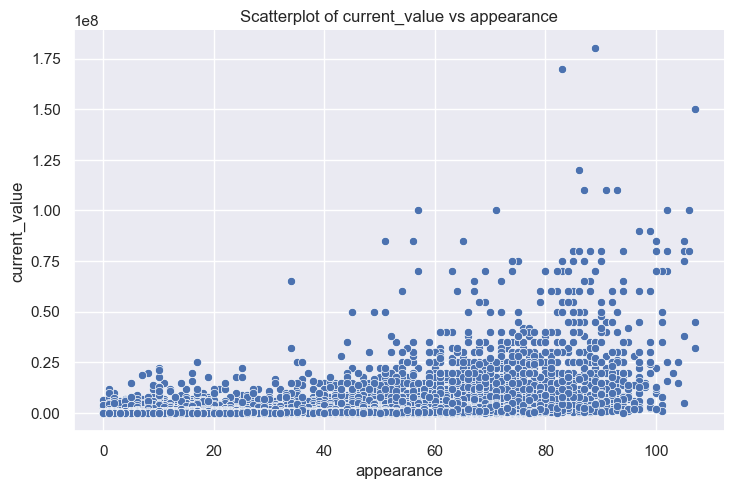

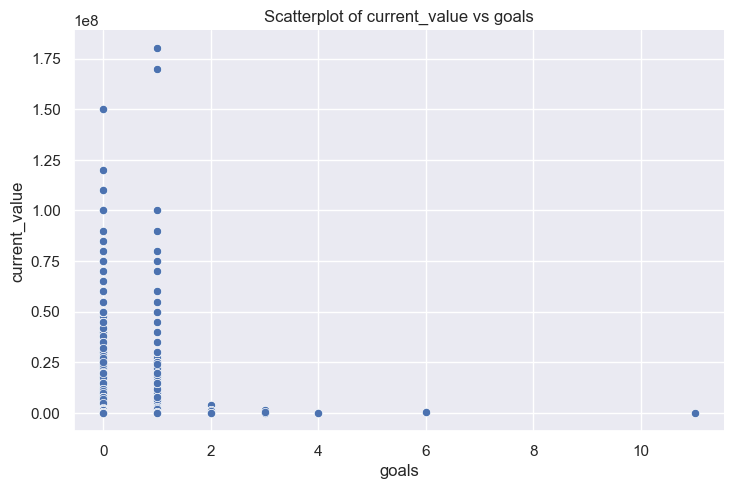

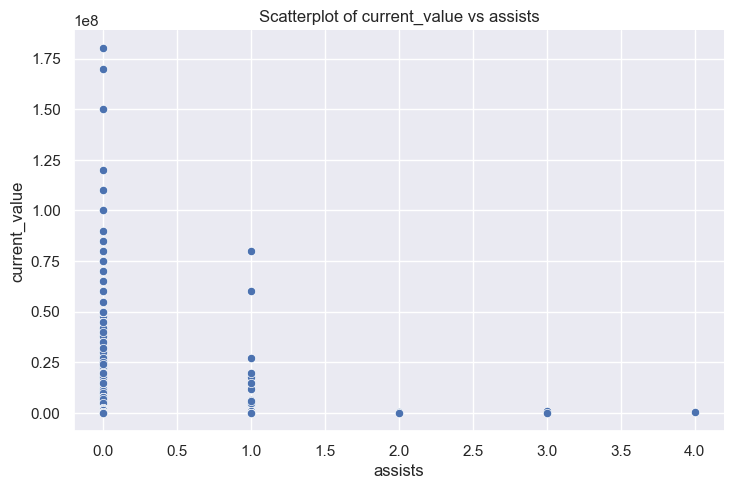

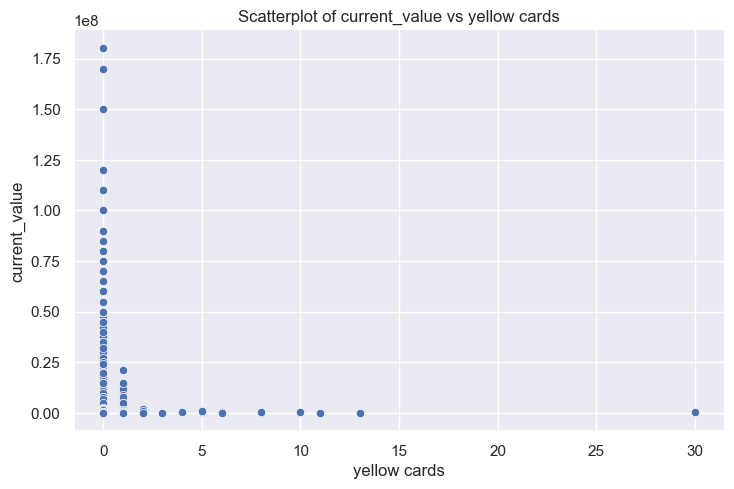

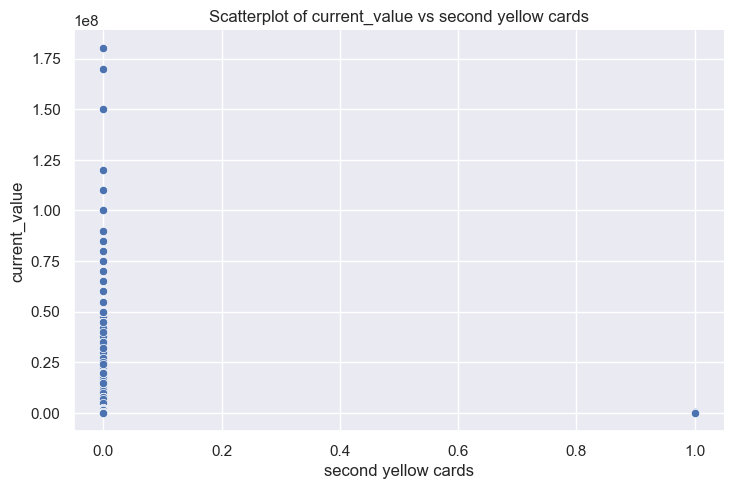

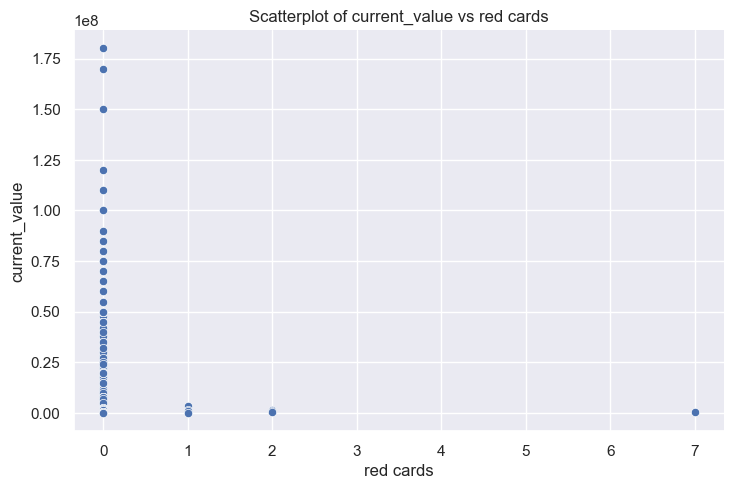

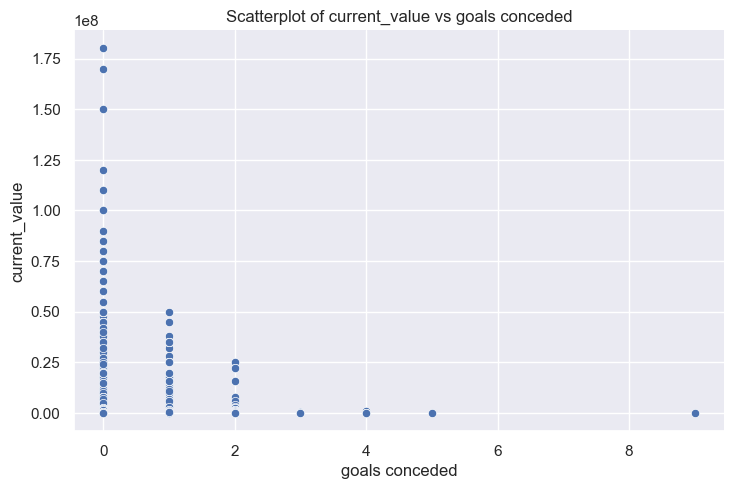

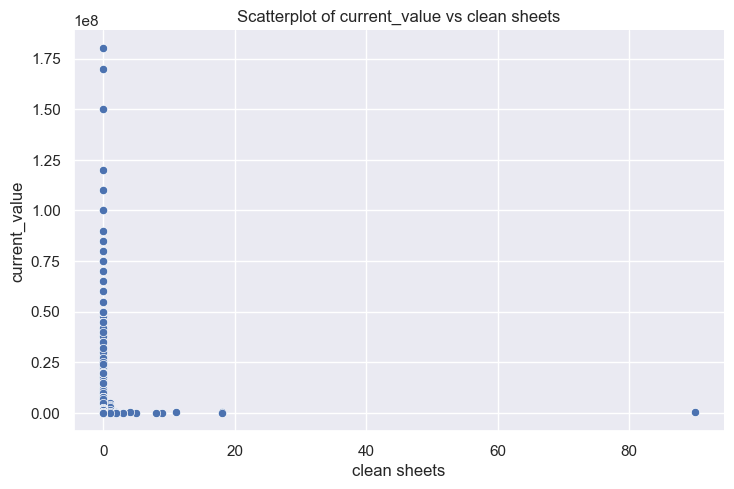

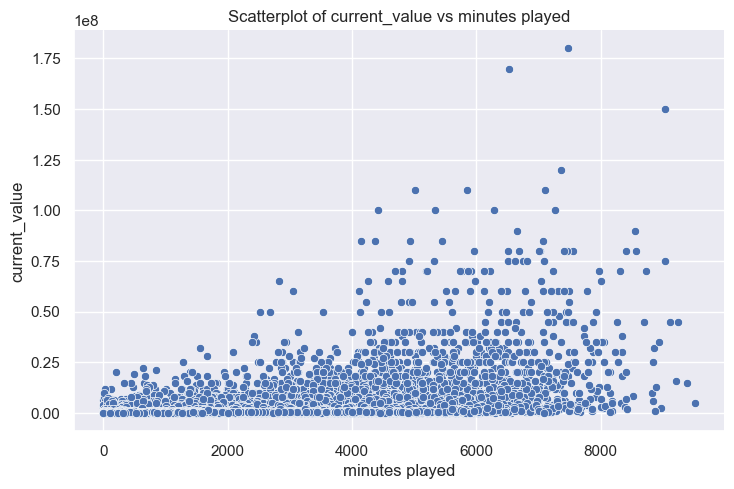

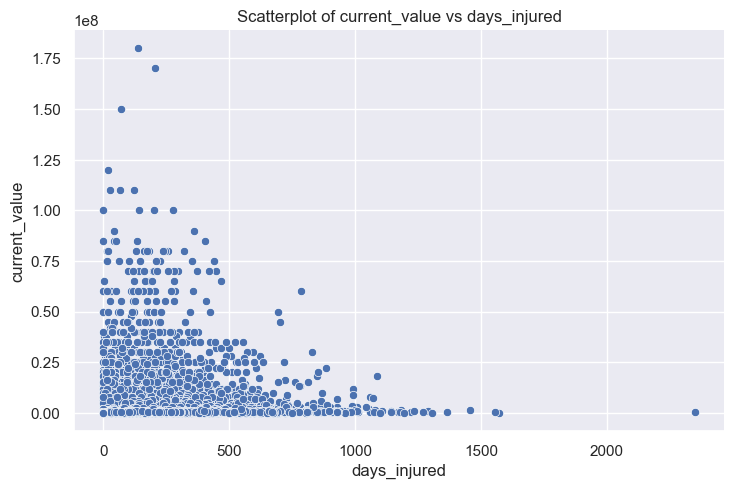

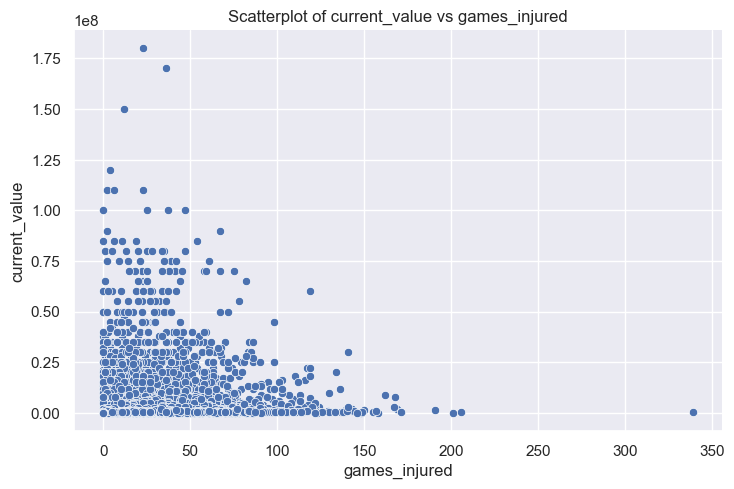

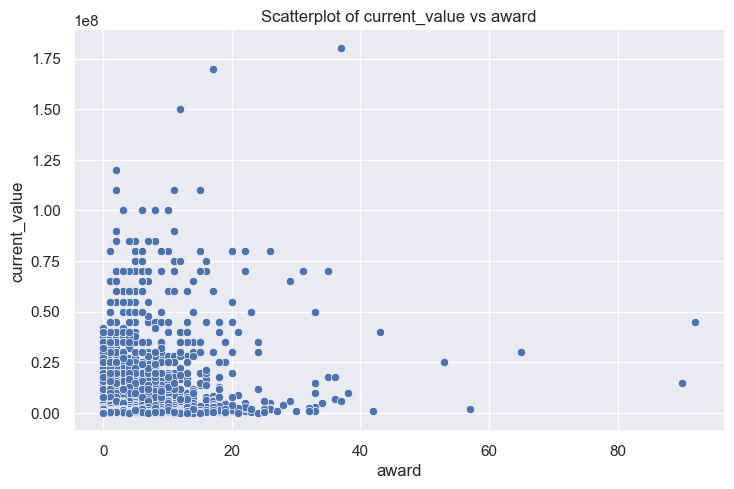

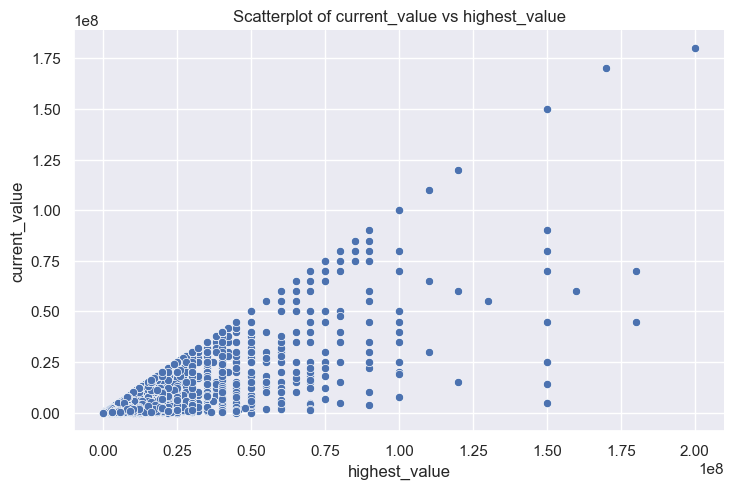

In [32]:
# List of independent variables (x_vars)
x_vars = ['height', 'age', 'appearance', 'goals', 'assists', 
          'yellow cards', 'second yellow cards', 'red cards', 
          'goals conceded','clean sheets', 'minutes played', 
          'days_injured', 'games_injured', 'award','highest_value']

# Loop through the variables and create scatterplots
for var in x_vars:
    sns.relplot(data=Player_raw, x=var, y='current_value', kind='scatter', height=5, aspect=1.5)
    plt.title(f"Scatterplot of current_value vs {var}")
    plt.show()

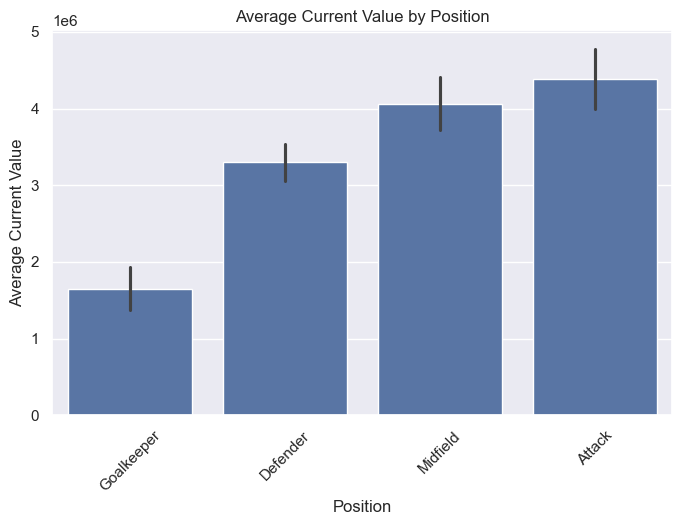

In [33]:
# Barplot to show the mean current_value for each position
sns.barplot(data=Player_raw, x='Position_Group', y='current_value') 
plt.title('Average Current Value by Position')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Position')
plt.ylabel('Average Current Value')
plt.show()

## Variable Selection to Prepare the Player_raw DF

In [38]:
Player_raw.columns.values

array(['player', 'team', 'name', 'position', 'height', 'age',
       'appearance', 'goals', 'assists', 'yellow cards',
       'second yellow cards', 'red cards', 'goals conceded',
       'clean sheets', 'minutes played', 'days_injured', 'games_injured',
       'award', 'current_value', 'highest_value', 'position_encoded',
       'winger', 'Position_Group'], dtype=object)

In [39]:
new_Player_raw = Player_raw.drop(['player', 'team', 'name', 'position', 'position_encoded'], axis =1)

In [40]:
new_Player_raw = pd.get_dummies(new_Player_raw, columns =['Position_Group'])

In [42]:
new_Player_raw.columns

Index(['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards',
       'second yellow cards', 'red cards', 'goals conceded', 'clean sheets',
       'minutes played', 'days_injured', 'games_injured', 'award',
       'current_value', 'highest_value', 'winger', 'Position_Group_Attack',
       'Position_Group_Defender', 'Position_Group_Goalkeeper',
       'Position_Group_Midfield'],
      dtype='object')

Correlation & Feature Importances

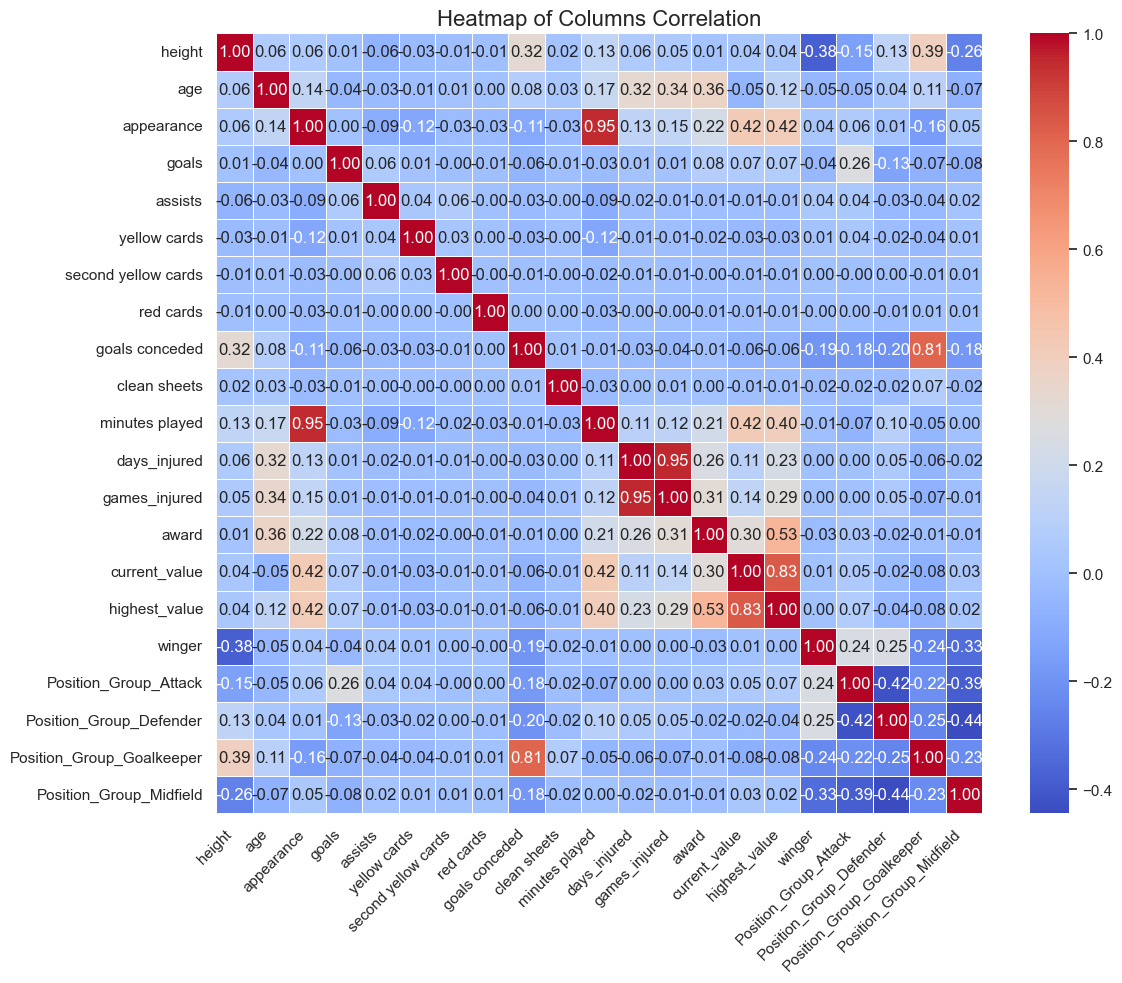

In [43]:
# Calculate the correlation matrix
correlation_matrix = new_Player_raw.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Customize the plot
plt.title("Heatmap of Columns Correlation", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

In [44]:
#split the data into x & y 

x=new_Player_raw.drop(['current_value'], axis = 1).values
x_coulmns = new_Player_raw.drop(['current_value'], axis = 1)
y = new_Player_raw['current_value']



In [45]:
# run a tree-base estimatirs
df = DecisionTreeClassifier(random_state=45, criterion='entropy', max_depth=10)
df.fit(x,y)

print('Score', df.score(x,y))

Score 0.571043332713409


In [46]:
correlation = new_Player_raw.corr()
print(correlation['current_value'].sort_values(ascending=False))

current_value                1.000000
highest_value                0.834553
minutes played               0.420542
appearance                   0.419656
award                        0.300454
games_injured                0.135654
days_injured                 0.107686
goals                        0.067004
Position_Group_Attack        0.051150
height                       0.040535
Position_Group_Midfield      0.030477
winger                       0.005034
red cards                   -0.007984
second yellow cards         -0.008105
clean sheets                -0.009116
assists                     -0.011266
Position_Group_Defender     -0.024965
yellow cards                -0.034388
age                         -0.050156
goals conceded              -0.063053
Position_Group_Goalkeeper   -0.077891
Name: current_value, dtype: float64


In [47]:
# Set the correlation threshold
threshold = 0.1  

# Filter the correlations
selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
selected_features

Index(['appearance', 'minutes played', 'days_injured', 'games_injured',
       'award', 'current_value', 'highest_value'],
      dtype='object')

In [48]:
selected_features = ['appearance', 'minutes played', 'days_injured', 'games_injured',
       'award', 'current_value', 'highest_value']



In [49]:
new_Player_raw = new_Player_raw[selected_features]
new_Player_raw.head()

,appearance,minutes played,days_injured,games_injured,award,current_value,highest_value
0,104,9390,42,5,13,15000000,70000000
1,15,1304,510,58,1,1500000,22000000
2,4,292,697,84,4,600000,6000000
3,82,6408,175,22,9,50000000,50000000
4,63,5031,238,51,21,40000000,80000000


Prepare train and test data

In [52]:
# Prepare data
x = new_Player_raw.drop(['current_value'], axis = 1).values
x_coulmns = new_Player_raw.drop(['current_value'], axis = 1)
y = new_Player_raw['current_value']


# run a tree-base estimatirs
df = DecisionTreeClassifier(random_state=45, criterion='entropy', max_depth=10)
df.fit(x,y)

print('Score', df.score(x,y))



Score 0.532267063418263


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [54]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
model = LinearRegression()

In [56]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [57]:
y_pred = model.predict(X_test_scaled) 

In [58]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])

In [59]:
coeff_df

,Coefficient
appearance,-9.018703e+05
minutes played,1.819204e+06
days_injured,6.759361e+05
games_injured,-1.398213e+06
award,-1.717732e+06
highest_value,8.284465e+06


In [60]:
print(f" Linear regression intercept: {model.intercept_}") 

 Linear regression intercept: 3622354.9924444947


Evaluating the Model

In [61]:
y_base = [y_train.mean()] * len(y_test)

In [62]:
y_base

[3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,


In [63]:
# our benchmark model
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base:2e}')

Mean Squared Error of base model: 9.043470e+13


In [64]:
# Linear model r2 score
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: 0.7400142473162681
R Square for testing: 0.7412094752355072
